<a href="https://colab.research.google.com/github/GordanY/tensorflow-learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A simple illustration of tensorflow by single variable linear regression
Using MNIST dataset from Tensorflow Datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

## Get the sample

In [2]:
ds, md = tfds.load("mnist", as_supervised = True, with_info = True)
train_ds, test_ds = ds["train"], ds["test"]

In [3]:
def normalize(datas, labels):
  datas = tf.cast(datas, tf.float32) / 10
  return datas, labels


train_ds, test_ds = train_ds.map(normalize), test_ds.map(normalize)

## Train the model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
BATCH_SIZE = 32
train_ds = train_ds.cache().repeat().shuffle(md.splits["train"].num_examples).batch(BATCH_SIZE)
test_ds = test_ds.cache().batch(BATCH_SIZE)

In [8]:
history = model.fit(train_ds, epochs=5, steps_per_epoch=math.ceil(md.splits["train"].num_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1027 - accuracy: 0.9694
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.9941


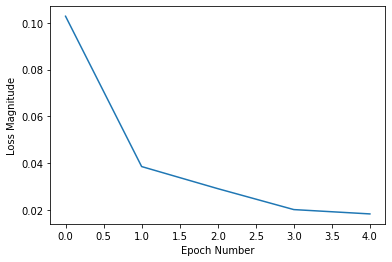

In [9]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Result

In [10]:
test_loss, test_accuracy = model.evaluate(test_ds, steps=math.ceil(md.splits["test"].num_examples/32))
print('accuracy:', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.0434 - accuracy: 0.9889
accuracy: 0.9889000058174133


index? (0-31)30
labels:  9
prediction:  9


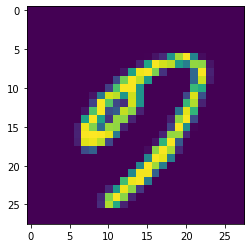

In [11]:
for test_images, test_labels in test_ds.take(1):

    test_images_n = test_images.numpy()
    test_labels_n = test_labels.numpy()
    predictions = model.predict(test_images_n)

    i = int(input("index? (0-31)"))
    
    plt.imshow(test_images[i].numpy().reshape((28,28)))
    print("labels: ", test_labels_n[i])
    print("prediction: ", np.argmax(predictions[i]))

